# Regression Models with cuML, scikit-learn, and XGBoost
This notebook demonstrates how to build and evaluate various regression models using cuML for GPU acceleration, scikit-learn for Partial Least Squares Regression, and XGBoost.

In [1]:
import numpy as np
import cuml
import cupy as cp
from cuml.linear_model import LinearRegression as cuLinearRegression
from cuml.linear_model import Lasso as cuLasso
from cuml.linear_model import Ridge as cuRidge
from cuml.linear_model import ElasticNet as cuElasticNet
from cuml.svm import SVR as cuSVR
from cuml.neighbors import KNeighborsRegressor as cuKNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler
import os
os.chdir("/local-scratch/GlucoseProject/mobicom23_mobispectral/regression")
import sys
sys.path.append(os.getcwd())
from utils import prepare_data, evaluate_image, load_model, save_model

In [2]:
data_root = '../datasets/dataset_skin/regression'
file_train = 'concatset_train.txt'
file_test = 'concatset_test.txt'
step = 2

In [3]:
X_train, y_train, X_test, y_test, test_data = prepare_data(data_root, file_train, file_test, step)
X_train, X_val, y_train, y_val = TTS(X_train, y_train, test_size=0.3, random_state=42)

In [4]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = cp.array(X_train)
X_test = cp.array(X_test)

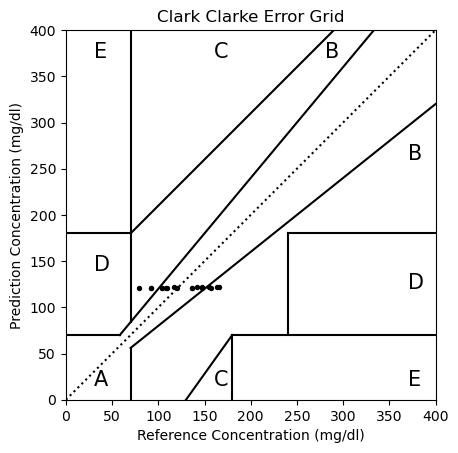

In [5]:
# Linear Regression
lin_reg = cuLinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = cp.asnumpy(lin_reg.predict(X_test))
mse_lin = mean_squared_error(y_test, y_pred_lin)
evaluate_image(test_data, model=lin_reg)

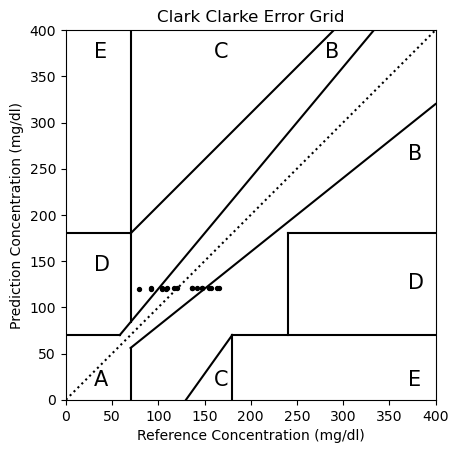

In [6]:
# Lasso Regression
lasso_reg = cuLasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = cp.asnumpy(lasso_reg.predict(X_test))
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
evaluate_image(test_data, model=lasso_reg)

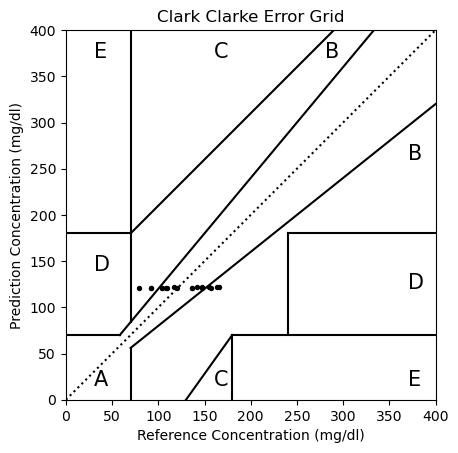

In [7]:
# Ridge Regression
ridge_reg = cuRidge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = cp.asnumpy(ridge_reg.predict(X_test))
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
evaluate_image(test_data, model=ridge_reg)

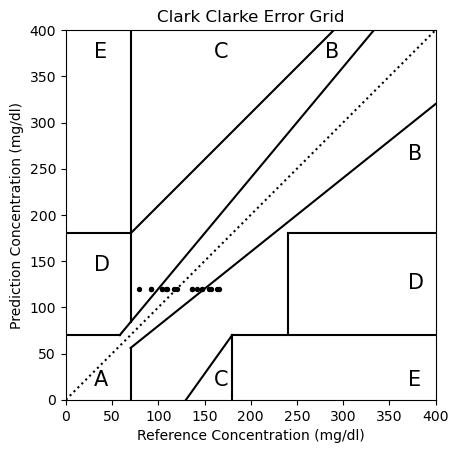

In [8]:
# Elastic Net
elastic_net = cuElasticNet()
elastic_net.fit(X_train, y_train)
y_pred_elastic = cp.asnumpy(elastic_net.predict(X_test))
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
evaluate_image(test_data, model=elastic_net)

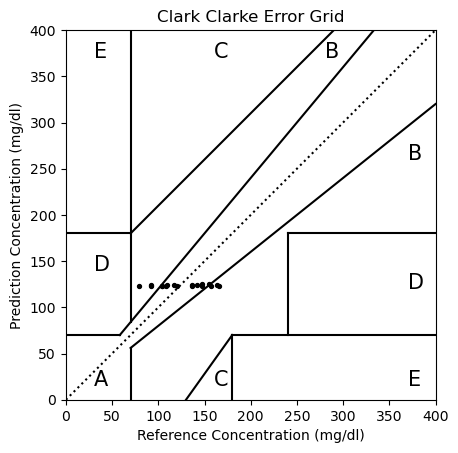

In [9]:
# Multi-Layer Perceptron
mlp_reg = MLPRegressor()
mlp_reg.fit(cp.asnumpy(X_train), cp.asnumpy(y_train))
y_pred_mlp = mlp_reg.predict(cp.asnumpy(X_test))
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
evaluate_image(test_data, model=mlp_reg)

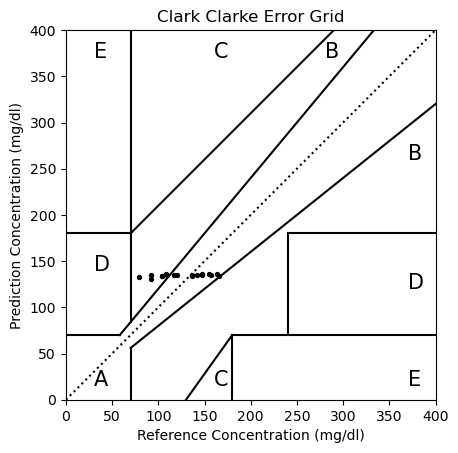

In [10]:
# KNN
knn_reg = cuKNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn = cp.asnumpy(knn_reg.predict(X_test))
mse_knn = mean_squared_error(y_test, y_pred_knn)
evaluate_image(test_data, model=knn_reg)

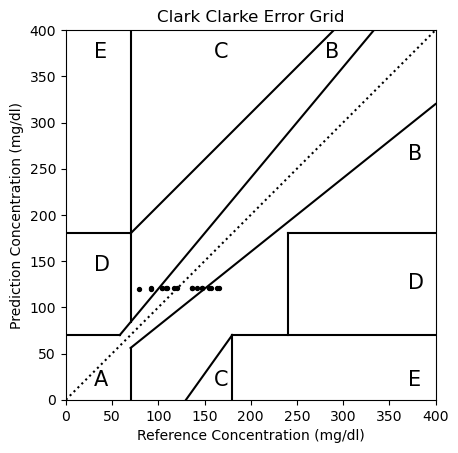

In [11]:
# Partial Least Squares
pls_reg = PLSRegression()
pls_reg.fit(cp.asnumpy(X_train), cp.asnumpy(y_train))
y_pred_pls = pls_reg.predict(cp.asnumpy(X_test))
mse_pls = mean_squared_error(y_test, y_pred_pls)
evaluate_image(test_data, model=pls_reg)

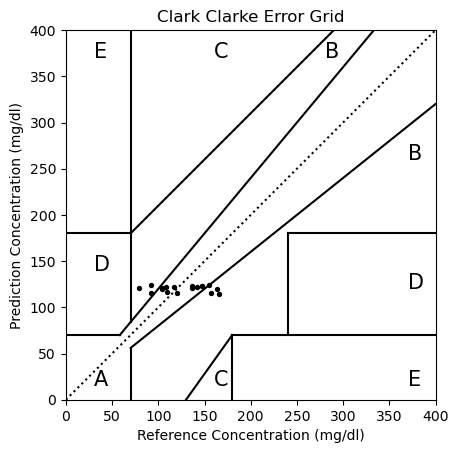

In [12]:
# XGBoost
xgb_reg = XGBRegressor(device='cuda', tree_method='hist')
xgb_reg.fit(X_train, y_train)
y_pred_xgb = cp.asnumpy(xgb_reg.predict(X_test))
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
evaluate_image(test_data, model=xgb_reg)

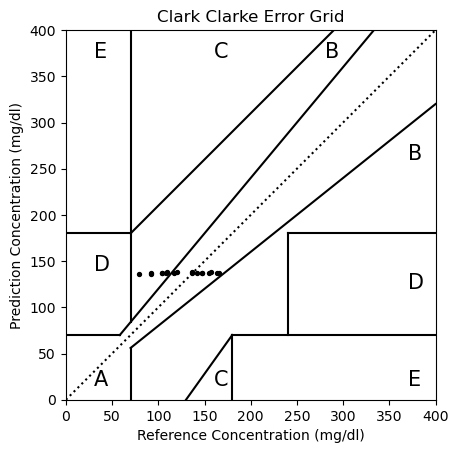

In [13]:
# Support Vector Regressor
svr_reg = cuSVR()
svr_reg.fit(X_train, y_train)
y_pred_svr = cp.asnumpy(svr_reg.predict(X_test))
mse_svr = mean_squared_error(y_test, y_pred_svr)
evaluate_image(test_data, model=svr_reg)

In [14]:
# Print the Mean Squared Error for each model
print("Mean Squared Error for Linear Regression:", mse_lin)
print("Mean Squared Error for Lasso Regression:", mse_lasso)
print("Mean Squared Error for Ridge Regression:", mse_ridge)
print("Mean Squared Error for Elastic Net:", mse_elastic)
print("Mean Squared Error for MLP:", mse_mlp)
print("Mean Squared Error for SVR:", mse_svr)
print("Mean Squared Error for XGBoost:", mse_xgb)
print("Mean Squared Error for PLS:", mse_pls)

Mean Squared Error for Linear Regression: 623.48175
Mean Squared Error for Lasso Regression: 663.24756
Mean Squared Error for Ridge Regression: 623.3997
Mean Squared Error for Elastic Net: 685.0446
Mean Squared Error for MLP: 431.57794
Mean Squared Error for SVR: 585.2515
Mean Squared Error for XGBoost: 470.47723
Mean Squared Error for PLS: 677.9239573954318


In [ ]:
# # Trained PLS based on S1 and S2
# model = load_model('Models/PLS_regressor1.model')
# evaluate_image(test_data, model=model)

In [ ]:
# PLSR
# Best parameter: tol: 1e-06, scale: False, n_components: 20, max_iter: 500

In [ ]:
[ 8 12 19 21 26 32 33 43 48 50 55 58 59 65]
print(selected_features * 2) 